# Shallow Waters

Here we setup, run and plot a two-dimensional shallow water model configuration from [ShallowWaters.jl](https://github.com/milankl/ShallowWaters.jl)

In [1]:
using ClimateModels, Pkg, Plots, NetCDF, Suppressor

## Formulate Model

In [2]:
URL=PackageSpec(url="https://github.com/milankl/ShallowWaters.jl")

parameters=Dict(:nx => 100, :ny => 50, :Lx => 2000e3, :nd=>500) #adjustable parameters

function SWM(x)
    pth=pwd()
    cd(joinpath(x.folder,string(x.ID)))
    (nx,ny)=(x.inputs[:nx],x.inputs[:ny])
    (Lx,nd)=(x.inputs[:Lx],x.inputs[:nd])
    L_ratio = nx / ny
    @suppress run_model(;nx,Lx,L_ratio,Ndays=nd,output=true) #calling this may take several minutes (or more) depending on resolution
    cd(pth)
end

SWM (generic function with 1 method)

## Setup Model

`ModelConfig` wraps up the model into a data structure, `MC`, which also includes e.g. the online location for the model repository, parameters, and a local folder path used later on.

In [3]:
MC=ModelConfig(model=URL,configuration=SWM,inputs=parameters)

  ID            = a703c448-7f8f-4fe9-8e47-5c719fefff9d
  model         = https://github.com/milankl/ShallowWaters.jl
  configuration = SWM
  folder        = /tmp
  log subfolder = a703c448-7f8f-4fe9-8e47-5c719fefff9d/log


The `setup` function then clones the repository to a local (temporary) folder and sets up the `git` log subfolder.

In [4]:
setup(MC);

The version of `ShallowWaters.jl` selected by `URL` should be used. The `Pkg.develop` command below should ensure that this is the case.
In case another version of `ShallowWaters.jl` was already being used, you may want to run `Pkg.free("ShallowWaters")` afterwards.

In [5]:
MCdir=joinpath(MC.folder,string(MC.ID))
@suppress Pkg.develop(path=MCdir)
using ShallowWaters

## Run Model

The `SWM` model is run within the `launch` command which also updates the `git` log accordingly.

In [6]:
launch(MC);

## Plot Results

Here we read temperature from the `netcdf` output file and and map it for time `parameters[:nd]`

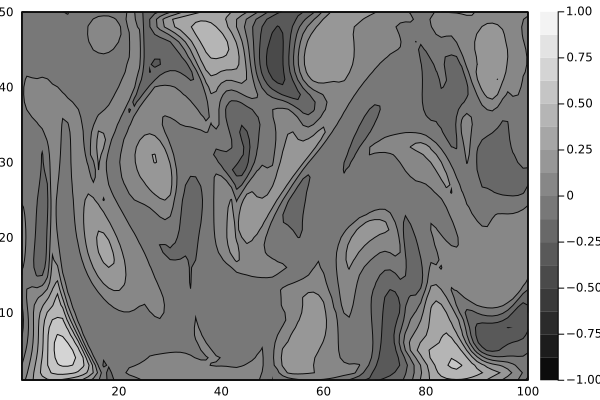

In [7]:
ncfile = NetCDF.open(joinpath(MCdir,"run0000","sst.nc"))
sst = ncfile.vars["sst"][:,:,:]
img=contourf(sst[:,:,parameters[:nd]]',c = :grays, clims=(-1.,1.), frmt=:png)

Alternatively, one can create an animated `gif` e.g. as shown here.

```
anim = @animate for t ∈ 1:parameters[:nd]+1
    contourf(sst[:,:,t+1]',c = :grays, clims=(-1.,1.))
end
gif(anim, joinpath(MCdir,"run0000","sst.gif"), fps = 40)
```

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*